In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl 
from sklearn.impute import SimpleImputer

In [2]:
chemin="D:/BUREAU/infos/PROJET_TUTORE_SEMESTRE_2/DR41.txt"

In [3]:
DR41 = pd.read_csv(chemin,low_memory=False)

In [4]:
d=DR41.copy()

In [5]:
d.head()

,DR,CEN,POLICE,O,P,ENR,MM,AAAA,DATE-FACT,DIAM,...,DATE-ABON,DATE-RESIL,TOURNEE,DATE-REGLT,AAENC,MMENC,RESILIE,CATEGORIE,NOUVEAU,DATE-REGLT-ENC
0,41,140,19333,3,3,EN,5,2014,2014-06-03 00:00:00.000,1,...,NaN,1996-03-10 00:00:00.000,65.0,2014-08-04 00:00:00.000,2014.0,août,1.0,PRIVE,0,5
1,41,140,15416,1,3,EN,5,2014,2014-06-12 00:00:00.000,1,...,NaN,1993-12-23 00:00:00.000,10.0,2014-09-22 00:00:00.000,2014.0,sept.,1.0,PRIVE,0,5
2,41,140,15416,1,3,EN,8,2014,2014-09-12 00:00:00.000,1,...,NaN,1993-12-23 00:00:00.000,10.0,2014-10-14 00:00:00.000,2014.0,oct.,1.0,PRIVE,0,8
3,41,140,15416,1,3,EN,11,2014,2014-12-11 00:00:00.000,1,...,NaN,1993-12-23 00:00:00.000,10.0,2015-01-08 00:00:00.000,2015.0,janv.,1.0,PRIVE,0,11
4,41,140,15417,1,3,EN,2,2014,2014-02-28 00:00:00.000,1,...,NaN,1993-12-23 00:00:00.000,41.0,2014-04-01 00:00:00.000,2014.0,avr.,1.0,PRIVE,0,2


In [49]:
pd.set_option("display.max_columns",35)

In [9]:
d.columns

Index(['DR', 'CEN', 'POLICE', 'O', 'P', 'ENR', 'MM', 'AAAA', 'DATE-FACT',
       'DIAM', 'CUBCONS', 'CUBFAC', 'FORFAIT', 'SOCIAL', 'DOMEST', 'NORMAL',
       'INDUST', 'ADMINI', 'MONT-SOD', 'MONT-TVA', 'MONT-FDE', 'MONT-FNE',
       'MONT-ASS-TTC', 'MONT-FRAIS-CPT', 'MONT-TTC', 'DATE-ABON', 'DATE-RESIL',
       'TOURNEE', 'DATE-REGLT', 'AAENC', 'MMENC', 'RESILIE', 'CATEGORIE',
       'NOUVEAU', 'DATE-REGLT-ENC'],
      dtype='object')

In [9]:
d.isna().sum()

DR                     0
CEN                    0
POLICE                 0
O                      0
P                      0
ENR                    0
MM                     0
AAAA                   0
DATE-FACT              0
DIAM                   0
CUBCONS                0
CUBFAC                 0
FORFAIT                0
SOCIAL                 0
DOMEST                 0
NORMAL                 0
INDUST                 0
ADMINI                 0
MONT-SOD               0
MONT-TVA               0
MONT-FDE               0
MONT-FNE               0
MONT-ASS-TTC           0
MONT-FRAIS-CPT         0
MONT-TTC            6185
DATE-ABON         874761
DATE-RESIL        171308
TOURNEE             6335
DATE-REGLT         57716
AAENC              57716
MMENC              57716
RESILIE             5539
CATEGORIE              0
NOUVEAU                0
DATE-REGLT-ENC         0
dtype: int64

In [114]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3758889 entries, 0 to 3758888
Data columns (total 35 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR              int64  
 1   CEN             int64  
 2   POLICE          int64  
 3   O               int64  
 4   P               int64  
 5   ENR             object 
 6   MM              int64  
 7   AAAA            int64  
 8   DATE-FACT       object 
 9   DIAM            int64  
 10  CUBCONS         int64  
 11  CUBFAC          int64  
 12  FORFAIT         int64  
 13  SOCIAL          int64  
 14  DOMEST          int64  
 15  NORMAL          int64  
 16  INDUST          int64  
 17  ADMINI          int64  
 18  MONT-SOD        object 
 19  MONT-TVA        int64  
 20  MONT-FDE        object 
 21  MONT-FNE        int64  
 22  MONT-ASS-TTC    object 
 23  MONT-FRAIS-CPT  int64  
 24  MONT-TTC        object 
 25  DATE-ABON       object 
 26  DATE-RESIL      object 
 27  TOURNEE         float64
 28  DATE-REGLT  

# Nettoyages de donnees

In [8]:
#1min

liste = ["CUBCONS", "CUBFAC", "FORFAIT",'INDUST', "SOCIAL", "DOMEST", "NORMAL", "ADMINI", "MONT-SOD", "MONT-TVA", "MONT-FDE", "MONT-FNE", "MONT-ASS-TTC", "MONT-FRAIS-CPT"]
liste_date = ['DATE-FACT','DATE-REGLT']
liste_quali = ['CATEGORIE']

# pour changer le type numerique

for col in liste:
    d[col] = pd.to_numeric(d[col].astype(str).replace(",","."),errors="coerce")
    
for col in liste_date:
    d[col] = pd.to_datetime(d[col].replace(" 00:00:00.000",""),format="%Y-%m-%d")
    
for col in liste_quali:
    d[col] = d[col].astype(str)
    
    
# col_cat=(musique.columns[musique.dtypes==object]).to_list()
# print(col_cat)
# col_num = (musique.columns[musique.dtypes != object]).to_list()
# print(col_num)    

In [9]:
d[['DATE-FACT','DATE-REGLT']].head()

,DATE-FACT,DATE-REGLT
0,2017-08-24,2017-10-19
1,2017-09-25,2017-10-19
2,2017-10-25,2017-10-25
3,2017-11-24,2018-01-08
4,2017-12-27,2018-01-08


In [26]:
import locale
locale.setlocale(locale.LC_TIME, "fr_FR.UTF-8")

'fr_FR.UTF-8'

In [10]:
conditions ={
    1:"janv",2:"févr",3:"mars",4:"avr",5:"mai",6:"juin",7:"juil",8:"août",9:"sept",10:"oct",11:"nov",12:"déc", 
}
d["MM"]= d["MM"].map(conditions)

In [11]:
d["MM"].unique()

array(['août', 'sept', 'oct', 'nov', 'déc', 'janv', 'avr', 'juil', 'mars',
       'juin', 'févr', 'mai'], dtype=object)

In [12]:
conditions1 ={
    '1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'11':11,'12':12,'août':8,'sept.':9,'oct.':10,'janv.':1,'avr.':4,'févr.':2,'mars':3,'juil.':7,
    'juin':6,'déc.':12,'mai':5,'nov.':11,
    
}

conditions2 = {1:"janv",2:"févr",3:"mars",4:"avr",5:"mai",6:"juin",7:"juil",8:"août",9:"sept",10:"oct",11:"nov",12:"déc"}

d["MMENC"]=(d["MMENC"].map(conditions1)).map(conditions2)



In [13]:
d["MMENC"].unique()

array(['oct', 'janv', 'avr', 'juil', 'mai', 'août', 'nov', 'févr', 'juin',
       'sept', 'mars', nan, 'déc'], dtype=object)

In [29]:
d["ENR"].unique()

array(['EN', 'FC', 'AV', 'FM'], dtype=object)

In [38]:
conditions3 = {"EN":0,"FC":1,"AV":2,"FM":3}
d["ENR"] = d["ENR"].map(conditions3)

In [40]:
d["ENR"].unique()

array([0, 1, 2, 3], dtype=int64)

In [41]:
conditions4 = {"PRIVE":0,"ADMIN":1}
d["CATEGORIE"] = d["CATEGORIE"].map(conditions4)

In [42]:
d["CATEGORIE"].unique()

array([0, 1], dtype=int64)

In [132]:
# d["AAENC"] = pd.to_datetime((d["DATE-REGLT"].dt.year).astype(str).replace(".0",""),format="%Y")
# d["MMENC"] = pd.to_datetime((d["DATE-REGLT"].dt.month).astype(str).replace(".0",""),format="%m")

# liste = "2014-09-22 00:00:00.000"

# def Annee(D):
#     liste = []
#     D=D.replace(" 00:00:00.000","")
#     for i in range(len(D)):
#         liste1=D[i].astype(str).split("-")
#         liste.append(liste1[0])
#     return liste

# def Mois(D):
#     liste2 = []
#     D=D.replace(" 00:00:00.000","")
#     for i in range(len(D)):
#         liste3=D[i].astype(str).split("-")
#         liste2.append(liste3[1])
#     return liste2

In [41]:
#(d[d["MMENC"].notnull()])["MMENC"]

In [135]:
# liste = ['août', 'sept.', 'oct.', 'janv.', 'avr.', 'mai', 'nov.', 'févr.',
#        'mars', 'juil.', "nan", 'juin', 'déc.', '6', '9', '12', '3', '5',
#        '8', '11', '2', '7', '10', '4', '1']
# liste1 = []
# for i in range(len(liste)):
#     liste2 = liste[i].split(".")
#     liste1.append(liste2[0])
# print(liste1)    

In [137]:
# liste = ['août', 'sept.', 'oct.', 'janv.', 'avr.', 'mai', 'nov.', 'févr.',
#        'mars', 'juil.', "nan", 'juin', 'déc.', '6', '9', '12', '3', '5',
#        '8', '11', '2', '7', '10', '4', '1']
# liste1=[]
# for i in range(len(liste)):
#     liste[i]=liste[i].replace(".","")
#     liste1.append(liste[i])
# print(liste1)

In [113]:
print(d["CUBCONS"].dtypes)

int64


In [55]:
sum((d["CUBCONS"]<d["CUBFAC"]) & (d["CUBCONS"]>9))
#individus pour lesquelles le cubage consommé est inferieur au cubage facturé(avec cubcons>9)

31480

In [56]:
d[(d["CUBCONS"]<d["CUBFAC"]) & (d["CUBCONS"]>9)].head()

,DR,CEN,POLICE,O,P,ENR,MM,AAAA,DATE-FACT,DIAM,CUBCONS,CUBFAC,FORFAIT,SOCIAL,DOMEST,NORMAL,INDUST,ADMINI,MONT-SOD,MONT-TVA,MONT-FDE,MONT-FNE,MONT-ASS-TTC,MONT-FRAIS-CPT,MONT-TTC,DATE-ABON,DATE-RESIL,TOURNEE,DATE-REGLT,AAENC,MMENC,RESILIE,CATEGORIE,NOUVEAU,DATE-REGLT-ENC
74,41,140,22053,3,3,FC,12,2014,2014-12-15 00:00:00.000,1,30,35,9,9,17,0,0,0,7980,697,1440,357,158,0,2013-03-06 00:00:00.000,NaN,1997-03-18 00:00:00.000,139.0,2015-01-19 00:00:00.000,2015.0,janv.,1.0,PRIVE,0,12
377,41,131,41918,2,3,EN,7,2015,2015-08-06 00:00:00.000,1,39,42,9,9,24,0,0,0,9576,984,1981,504,1139,0,2015-04-10 00:00:00.000,NaN,2001-01-13 00:00:00.000,751.0,2015-11-05 00:00:00.000,2015.0,nov.,1.0,PRIVE,0,19
885,41,140,32987,3,3,FC,5,2015,2015-06-13 00:00:00.000,1,34,38,9,9,20,0,0,0,8664,820,1672,420,176,0,2013-02-15 00:00:00.000,NaN,2001-01-15 00:00:00.000,107.0,2015-08-19 00:00:00.000,2015.0,août,1.0,PRIVE,0,17
886,41,140,32987,3,3,FC,5,2015,2015-08-22 00:00:00.000,1,126,130,9,9,72,40,0,0,29640,4592,16544,3372,1313,0,2013-02-15 00:00:00.000,NaN,2001-01-15 00:00:00.000,107.0,2015-11-18 00:00:00.000,2015.0,nov.,1.0,PRIVE,0,17
1503,41,131,40096,1,3,FC,11,2015,2015-11-02 00:00:00.000,1,19,21,9,9,3,0,0,0,4788,123,358,63,72,0,2009-11-11 00:00:00.000,2018-04-25 00:00:00.000,2009-11-11 00:00:00.000,230.0,2016-01-20 00:00:00.000,2016.0,janv.,0.0,PRIVE,0,23


In [84]:
d["DATE-RESIL"].isna().sum()

559311

In [26]:
d["MMENC"].isna().sum()

258396

In [40]:
d.shape

(974536, 35)

In [78]:
d["MONT-SOD"]= (d["MONT-SOD"].str.replace(",",".")).astype(float)

In [9]:
d["MONT-SOD"].head()

0     5928.0
1     2052.0
2    20520.0
3     2052.0
4     4104.0
Name: MONT-SOD, dtype: float64

In [80]:
#d["MONT-FDE"]=(d["MONT-FDE"].str.replace(",",".")).apply(float)

In [13]:
#print(d["MONT-FDE"].dtypes)

float64


In [14]:
d["MONT-FDE"].head()

0     744.0
1      63.0
2    5692.0
3      63.0
4     126.0
Name: MONT-FDE, dtype: float64

In [82]:
# d["MONT-ASS-TTC"]=(d["MONT-ASS-TTC"].str.replace(",",".")).apply(float)

In [77]:
d[["DATE-REGLT","DATE-RESIL","MONT-TTC","DATE-REGLT-ENC"]].head()

,DATE-REGLT,DATE-RESIL,MONT-TTC,DATE-REGLT-ENC
0,2014-08-04 00:00:00.000,1996-03-10 00:00:00.000,2012-08-27 00:00:00.000,5
1,2014-09-22 00:00:00.000,1993-12-23 00:00:00.000,1993-12-23 00:00:00.000,5
2,2014-10-14 00:00:00.000,1993-12-23 00:00:00.000,1993-12-23 00:00:00.000,8
3,2015-01-08 00:00:00.000,1993-12-23 00:00:00.000,1993-12-23 00:00:00.000,11
4,2014-04-01 00:00:00.000,1993-12-23 00:00:00.000,1993-12-23 00:00:00.000,2


In [138]:
d.columns.get_loc("DATE-RESIL") #pour avoir l'indice d'une colonne

26

In [91]:
import datetime as dt

In [118]:
#d["DATE-RESIL"] = d["DATE-RESIL"].str.replace(" 00:00:00","") il un souci de plage que pandas ne gere pas 

In [15]:
# le changement du type de colonne DATE-RESILest assez delicat car il y des dates qui ne sont pas dans la plage que 
# gere pandas. alors pour ce fait, on va selectionner ces valeurs avec leur position pour mieux les visualiser et les gerer
# facilement 

d["DATE-RESIL"]=d["DATE-RESIL"].astype(str)

for i in range(len(d["DATE-RESIL"])):
    
    try:
        d.loc[i,"DATE-RESIL"] = pd.to_datetime(d.loc[i,"DATE-RESIL"].replace(" 00:00:000",""),format="%Y-%m-%d")
        a=d.loc[i+1,"DATE-RESIL"]
    except (ValueError, TypeError) as error:
        print(f" position:{i} date: {a} ")
    except KeyError:
        print(f" position:{974535} date: {a} ")

 position:52131 date: 9797-02-27 00:00:00.000 
 position:52132 date: 9797-02-27 00:00:00.000 
 position:52133 date: 9797-02-27 00:00:00.000 
 position:52134 date: 9797-02-27 00:00:00.000 
 position:215080 date: 9797-02-27 00:00:00.000 
 position:215081 date: 9797-02-27 00:00:00.000 
 position:215082 date: 9797-02-27 00:00:00.000 
 position:215083 date: 9797-02-27 00:00:00.000 
 position:264337 date: 9797-02-27 00:00:00.000 
 position:264338 date: 9797-02-27 00:00:00.000 
 position:264339 date: 9797-02-27 00:00:00.000 
 position:264340 date: 9797-02-27 00:00:00.000 
 position:265918 date: 9797-02-27 00:00:00.000 
 position:265919 date: 9797-02-27 00:00:00.000 
 position:265920 date: 9797-02-27 00:00:00.000 
 position:265921 date: 9797-02-27 00:00:00.000 
 position:394468 date: 9797-02-27 00:00:00.000 
 position:394469 date: 9797-02-27 00:00:00.000 
 position:394470 date: 9797-02-27 00:00:00.000 
 position:394471 date: 9797-02-27 00:00:00.000 
 position:3758888 date: nan 


In [17]:
d.shape[0]

974536

In [21]:
d.loc[974535,"DATE-RESIL"]

NaT

In [8]:
#on decide de les metre dans un fichier (15min) 

# d["DATE-RESIL"]=d["DATE-RESIL"].astype(str)
# liste =[]

# for i in range(len(d["DATE-RESIL"])):
    
#     try:
#         d.loc[i,"DATE-RESIL"] = pd.to_datetime(d.loc[i,"DATE-RESIL"].replace(" 00:00:00.000",""),format="%Y-%m-%d")
#         a=d.loc[i+1,"DATE-RESIL"]
#     except (ValueError, TypeError) as error:
#         liste.append((i,a))
#     except KeyError:
#         liste.append((3758888,a))
# liste = pd.DataFrame(liste, columns=["Position", "date"])

# liste.to_csv('D:/BUREAU/infos/PROJET_TUTORE_SEMESTRE_2/sorties.txt',index=False)

In [31]:
d["DATE-RESIL"].head()

0    1996-03-10 00:00:00
1    1993-12-23 00:00:00
2    1993-12-23 00:00:00
3    1993-12-23 00:00:00
4    1993-12-23 00:00:00
Name: DATE-RESIL, dtype: object

In [22]:
#avoir la date minimum afin de savoir comment gerer les dates aberrantes

def Annee(D):
    liste = []
    D=D.astype(str)
    D=D.replace(" 00:00:00.00","")
    for i in range(len(D)):
        if D[i] != "NaT":
            liste1=D[i].split("-")
            liste.append(pd.to_numeric(liste1[0]))
    return [min(liste), max(liste)]
Annee(d["DATE-RESIL"])

[1917, 9797]

In [23]:
for i in range(len(d["DATE-RESIL"])):
    if d.loc[i,"DATE-RESIL"] == "9797-02-27 00:00:00.000":
        d.loc[i,"DATE-RESIL"] = pd.to_datetime("1997-02-27 00:00:00.000",format="%Y-%m-%d")

In [35]:
d.loc[2778681,"DATE-RESIL"]

Timestamp('1965-04-14 00:00:00')

# imputation des differentes variables: 

In [37]:
a = ((6185*100)/974536)
a

0.6346610079053006

In [36]:
d.shape[0]

974536

In [38]:
d.describe()
#d.describe(exclude="number") pour les variables categorielles  

,DR,CEN,POLICE,O,P,AAAA,DIAM,CUBCONS,CUBFAC,FORFAIT,SOCIAL,DOMEST,NORMAL,INDUST,ADMINI,MONT-SOD,MONT-TVA,MONT-FDE,MONT-FNE,MONT-ASS-TTC,MONT-FRAIS-CPT,TOURNEE,AAENC,RESILIE,NOUVEAU,DATE-REGLT-ENC
count,974536.0,974536.000000,974536.000000,974536.000000,974536.000000,974536.000000,974536.000000,974536.000000,974536.000000,974536.000000,974536.000000,974536.000000,974536.000000,974536.000000,974536.000000,9.745300e+05,9.745340e+05,9.745300e+05,9.745300e+05,974536.0,974536.000000,968201.000000,916820.000000,968997.000000,974536.000000,974536.000000
mean,3.0,54.122801,4615.494744,1.872988,2.832848,2016.792643,1.049546,35.055149,36.257358,8.408759,5.673781,13.765185,2.764979,1.057742,4.584883,8.264455e+03,9.086792e+02,2.908553e+03,1.024284e+03,0.0,0.805085,31.068358,2017.094823,0.738059,0.055003,40.205632
std,0.0,44.159081,5502.028669,1.571998,0.553503,1.600926,0.376545,609.474061,609.557260,3.748788,4.004221,19.692973,16.406415,598.444434,106.691511,2.709383e+04,1.878357e+04,2.136253e+04,1.258447e+04,0.0,54.844696,60.849261,1.622707,0.439691,0.227985,19.469686
min,3.0,22.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,-280703.000000,-280703.000000,-9.000000,-9.000000,-72.000000,-210.000000,-280403.000000,-9961.000000,-2.277492e+06,-9.438487e+06,-3.275549e+06,-1.125593e+06,0.0,-675.000000,0.000000,2013.000000,0.000000,0.000000,1.000000
25%,3.0,22.000000,640.000000,1.000000,3.000000,2016.000000,1.000000,10.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.280000e+03,0.000000e+00,7.700000e+01,0.000000e+00,0.0,0.000000,5.000000,2016.000000,0.000000,0.000000,25.000000
50%,3.0,35.000000,2413.000000,1.000000,3.000000,2017.000000,1.000000,22.000000,22.000000,9.000000,9.000000,4.000000,0.000000,0.000000,0.000000,5.016000e+03,2.050000e+02,5.130000e+02,1.260000e+02,0.0,0.000000,13.000000,2017.000000,1.000000,0.000000,42.000000
75%,3.0,95.000000,6294.000000,2.000000,3.000000,2018.000000,1.000000,41.000000,41.000000,9.000000,9.000000,22.000000,0.000000,0.000000,0.000000,9.348000e+03,9.840000e+02,1.981000e+03,5.250000e+02,0.0,0.000000,37.000000,2018.000000,1.000000,0.000000,56.000000
max,3.0,196.000000,97617.000000,9.000000,3.000000,2019.000000,50.000000,280703.000000,280703.000000,920.000000,9.000000,81.000000,240.000000,280403.000000,41498.000000,9.461544e+06,9.438487e+06,5.863667e+06,4.689274e+06,0.0,3611.000000,999.000000,2020.000000,1.000000,1.000000,72.000000


In [24]:
d["DATE-RESIL"] = pd.to_datetime(d["DATE-RESIL"].replace(" 00:00:000",""),format="%Y-%m-%d")

In [25]:
d1 = d.copy()



  ### TRAVAIL DES LE DATASET NETTOYE (nettoye_DR41.txt)

In [1]:
# d2 = pd.read_csv('D:/BUREAU/infos/PROJET_TUTORE_SEMESTRE_2/nettoye_DR41.txt',low_memory=False)

In [52]:
d2.head()

,DR,CEN,POLICE,O,P,ENR,MM,AAAA,DATE-FACT,DIAM,CUBCONS,CUBFAC,FORFAIT,SOCIAL,DOMEST,NORMAL,INDUST,ADMINI,MONT-SOD,MONT-TVA,MONT-FDE,MONT-FNE,MONT-ASS-TTC,MONT-FRAIS-CPT,MONT-TTC,DATE-ABON,DATE-RESIL,TOURNEE,DATE-REGLT,AAENC,MMENC,RESILIE,CATEGORIE,NOUVEAU,DATE-REGLT-ENC
0,41,140,19333,3,3,0,mai,2014,2014-06-03,1,26,26,9,9,8,0,0,0,5928.0,328,744.0,168,103.0,0,2012-08-27 00:00:00.000,NaN,1996-03-10,65.0,2014-08-04,2014.0,août,1.0,0,0,5
1,41,140,15416,1,3,0,mai,2014,2014-06-12,1,7,9,9,0,0,0,0,0,2052.0,0,63.0,0,138.0,0,1993-12-23 00:00:00.000,NaN,1993-12-23,10.0,2014-09-22,2014.0,sept,1.0,0,0,5
2,41,140,15416,1,3,0,août,2014,2014-09-12,1,90,90,9,9,72,0,0,0,20520.0,2952,5692.0,1512,2867.0,0,1993-12-23 00:00:00.000,NaN,1993-12-23,10.0,2014-10-14,2014.0,oct,1.0,0,0,8
3,41,140,15416,1,3,0,nov,2014,2014-12-11,1,0,9,9,0,0,0,0,0,2052.0,0,63.0,0,138.0,0,1993-12-23 00:00:00.000,NaN,1993-12-23,10.0,2015-01-08,2015.0,janv,1.0,0,0,11
4,41,140,15417,1,3,0,févr,2014,2014-02-28,1,18,18,9,9,0,0,0,0,4104.0,0,126.0,0,54.0,0,1993-12-23 00:00:00.000,NaN,1993-12-23,41.0,2014-04-01,2014.0,avr,1.0,0,0,2


# AJUSTEMENT DU MODELE DE REGRESSION

In [51]:
conditions3 = {"EN":0,"FC":1,"AV":2,"FM":3}
d2["ENR"] = d2["ENR"].map(conditions3)

conditions4 = {"PRIVE":0,"ADMIN":1}
d2["CATEGORIE"] = d2["CATEGORIE"].map(conditions4)

In [117]:
!pip install statsmodels 

In [94]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [228]:
liste_int = ["CATEGORIE","ENR","CUBCONS","CUBFAC","FORFAIT","INDUST","SOCIAL","DOMEST","NORMAL","ADMINI","MONT-SOD","MONT-TVA","MONT-FNE","MONT-ASS-TTC","MONT-FRAIS-CPT"]

In [229]:
X = d2[liste_int]

In [169]:
d2["MONT-FDE"].agg(np.median)

822.0

In [230]:
d2["MONT-FDE"].fillna(822,inplace = True)

In [231]:
d2.isna().sum()

DR                      0
CEN                     0
POLICE                  0
O                       0
P                       0
ENR                     0
MM                      0
AAAA                    0
DATE-FACT               0
DIAM                    0
CUBCONS                 0
CUBFAC                  0
FORFAIT                 0
SOCIAL                  0
DOMEST                  0
NORMAL                  0
INDUST                  0
ADMINI                  0
MONT-SOD               48
MONT-TVA                0
MONT-FDE                0
MONT-FNE                0
MONT-ASS-TTC            6
MONT-FRAIS-CPT          0
MONT-TTC            45424
DATE-ABON         3226048
DATE-RESIL         559311
TOURNEE             45593
DATE-REGLT         258396
AAENC              258396
MMENC              258396
RESILIE             22285
CATEGORIE               0
NOUVEAU                 0
DATE-REGLT-ENC          0
dtype: int64

In [232]:
#imputation des variables

data = X[["MONT-SOD","MONT-ASS-TTC"]]

import sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(data)

In [243]:
X[["MONT-SOD","MONT-ASS-TTC"]] = X_imputed

C:\Users\hp\AppData\Local\Temp\ipykernel_14764\2283524711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["MONT-SOD","MONT-ASS-TTC"]] = X_imputed


In [234]:
X.isna().sum()

CATEGORIE         0
ENR               0
CUBCONS           0
CUBFAC            0
FORFAIT           0
INDUST            0
SOCIAL            0
DOMEST            0
NORMAL            0
ADMINI            0
MONT-SOD          0
MONT-TVA          0
MONT-FNE          0
MONT-ASS-TTC      0
MONT-FRAIS-CPT    0
dtype: int64

In [102]:
import sys
print(sys.version)

3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [101]:
!pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 1.6 MB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 383.6 kB/s eta 0:00:00


In [223]:
#je veux faire une matrice de correlation. alors je créé une nouvelle variable qui contient X(explicative) et Y(expliquée)

# X_Y = X.copy()

In [224]:
#ajout de la variable explicative au jeu de donnees

# X_Y["MONT-FDE"] = d2["MONT-FDE"]

In [227]:
# liste = ["CATEGORIE","ENR","CUBCONS","CUBFAC","FORFAIT","INDUST","SOCIAL","DOMEST","NORMAL","ADMINI","MONT-SOD","MONT-TVA","MONT-FNE","MONT-ASS-TTC","MONT-FRAIS-CPT","MONT-FDE"]

# for col in liste:
#     X_Y[col] = pd.to_numeric(X_Y[col].astype(str).replace('\u00A0',""))
    

In [226]:
#Matrice de correlation

# correlation = X_Y.corr(method="pearson")

In [235]:
# print(correlation["MONT-FDE"].sort_values(ascending=False).to_string())

In [219]:
# X_Y = X_Y.drop(["const"],axis=1)

In [248]:
liste_non_corr = ["CATEGORIE","ENR","FORFAIT","SOCIAL","DOMEST","MONT-ASS-TTC","MONT-FRAIS-CPT"]

X1 = X[liste_non_corr]

In [238]:
# plt.figure(figsize=(15,12.5)) 
# sns.heatmap(round(X_Y.corr()), annot=True, cmap='Blues', linewidth=0.9) 
# plt.show()

In [176]:
#modele de regression 

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(d2["MONT-FDE"], X) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               MONT-FDE   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 2.112e+06
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:29:08   Log-Likelihood:            -4.3315e+07
No. Observations:             3758889   AIC:                         8.663e+07
Df Residuals:                 3758873   BIC:                         8.663e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1026.4023     92.676    -11.

Interpretation: On a ici un Adj. R-squared=0.894 assez grand. Alors ce peut avoir un probleme fiabilite. 
Alors nous allons utiliser des variables explicatives, de sortes qu'il n'y ait pas de multicollinearite entre elles.

In [249]:
import statsmodels.api as sm
X1 = sm.add_constant(X1)
model = sm.OLS(d2["MONT-FDE"], X1) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               MONT-FDE   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 1.883e+06
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:27:27   Log-Likelihood:            -4.4703e+07
No. Observations:             3758889   AIC:                         8.941e+07
Df Residuals:                 3758881   BIC:                         8.941e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            109.8318     56.004      1.

In [179]:
d.describe()

,DR,CEN,POLICE,O,P,ENR,AAAA,DIAM,CUBCONS,CUBFAC,FORFAIT,SOCIAL,DOMEST,NORMAL,INDUST,ADMINI,MONT-SOD,MONT-TVA,MONT-FDE,MONT-FNE,MONT-ASS-TTC,MONT-FRAIS-CPT,TOURNEE,AAENC,RESILIE,CATEGORIE,NOUVEAU,DATE-REGLT-ENC
count,3758889.0,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758889e+06,3.758841e+06,3.758889e+06,3.758869e+06,3.758889e+06,3.758883e+06,3.758889e+06,3.713296e+06,3.500493e+06,3.736604e+06,3.758889e+06,3.758889e+06,3.758889e+06
mean,41.0,1.356848e+02,3.603428e+04,1.787161e+00,2.922938e+00,3.562010e-02,2.016308e+03,1.016194e+00,4.505229e+01,4.609023e+01,8.719545e+00,6.398118e+00,1.788223e+01,4.751322e+00,5.899714e+00,2.437548e+00,1.035176e+04,1.269786e+03,4.984996e+03,1.367698e+03,1.321653e+03,1.196890e+01,2.234938e+02,2.016573e+03,7.317998e-01,4.963701e-03,1.593466e-01,3.428280e+01
std,0.0,7.960862e+00,2.259330e+04,1.268611e+00,3.849511e-01,2.187391e-01,1.646528e+00,2.367991e-01,3.506369e+02,3.512154e+02,3.674312e+00,3.758922e+00,2.232152e+01,2.377590e+01,2.462770e+02,2.415586e+02,6.550152e+04,1.439395e+04,7.507774e+04,3.441337e+04,2.327369e+04,2.232620e+02,1.684635e+02,1.695304e+00,4.430225e-01,7.027847e-02,3.659990e-01,2.004738e+01
min,41.0,1.310000e+02,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,1.000000e+00,-3.680700e+04,-3.680700e+04,-9.000000e+00,-9.000000e+00,-8.100000e+01,-2.100000e+02,-3.671000e+04,-9.996000e+03,-8.391996e+06,-1.509087e+06,-6.196907e+06,-3.087462e+06,-3.922228e+06,-1.098600e+05,1.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,41.0,1.310000e+02,1.770900e+04,1.000000e+00,3.000000e+00,0.000000e+00,2.015000e+03,1.000000e+00,1.300000e+01,1.300000e+01,9.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.964000e+03,0.000000e+00,9.100000e+01,0.000000e+00,6.000000e+01,0.000000e+00,1.120000e+02,2.015000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01
50%,41.0,1.310000e+02,3.464000e+04,1.000000e+00,3.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,2.700000e+01,2.700000e+01,9.000000e+00,9.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.156000e+03,3.690000e+02,8.220000e+02,1.890000e+02,1.700000e+02,0.000000e+00,1.920000e+02,2.017000e+03,1.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01
75%,41.0,1.400000e+02,5.035600e+04,2.000000e+00,3.000000e+00,0.000000e+00,2.018000e+03,1.000000e+00,4.700000e+01,4.700000e+01,9.000000e+00,9.000000e+00,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.071600e+04,1.230000e+03,2.445000e+03,6.300000e+02,6.160000e+02,0.000000e+00,2.920000e+02,2.018000e+03,1.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01
max,41.0,1.760000e+02,9.999900e+04,9.000000e+00,3.000000e+00,3.000000e+00,2.019000e+03,1.500000e+01,1.020150e+05,1.020150e+05,1.256000e+03,5.800000e+01,1.240000e+02,3.100000e+02,1.017150e+05,5.198000e+04,9.963600e+06,4.181877e+06,9.978805e+06,8.555337e+06,5.970646e+06,3.611000e+03,7.790000e+02,2.020000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.200000e+01


## REPONSE AUX QUESTIONS:     



### Comment évolue le FDE depuis 2014 aussi bien dans la facturation que dans le recouvrement ?

In [22]:
d2[d2["MONT-FDE"]<0].shape[0]

2030

<AxesSubplot: title={'center': 'evolution du FDE depuis 2014 dans la facturation'}, xlabel='AAAA'>

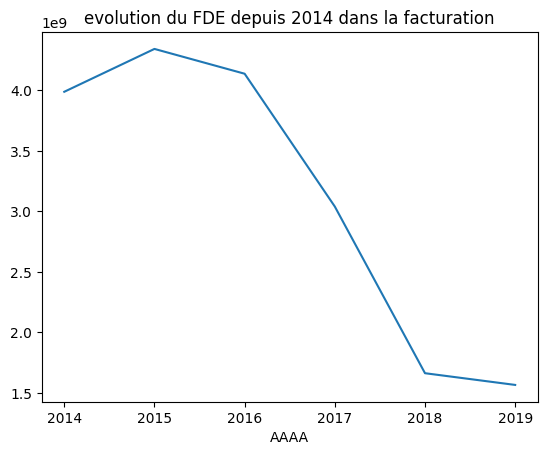

In [10]:
d2.groupby("AAAA")["MONT-FDE"].sum().plot(kind="line",title="evolution du FDE depuis 2014 dans la facturation")

In [12]:
d.groupby("AAAA")["MONT-FDE"].sum()

AAAA
2014    3.988672e+09
2015    4.342861e+09
2016    4.137820e+09
2017    3.040142e+09
2018    1.662636e+09
2019    1.565814e+09
Name: MONT-FDE, dtype: float64

In [258]:
#d2.groupby(["AAAA","CEN"])["MONT-FDE"].count().plot(kind="bar",title="evolution du FDE depuis 2014 par recouvrement")

<AxesSubplot: xlabel='AAAA'>

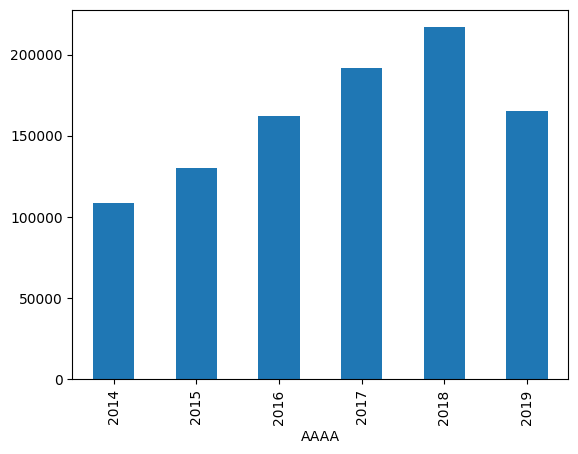

In [44]:
d2.groupby(["AAAA"])["CUBCONS"].sum().plot(kind = "bar")

In [7]:
Sont-ils devenus de mauvais payeurs ?

 Pour cette question, on va la combiner avec la question de la segmentation des clients.

On decide de créer un nouveau jeu de données avec une nouvelle colonne nommée "DIFF_DATE" qui est la difference des colonnes
DATE-FACT et DATE-REGLT (ce travail a et effectué sous R avec la fonction difftime(). Ceci pour nous permettre de avoir en moyenne le nombre de jour que met un client avant de se acquitter
de sa facture. Ce pourra nous permettre de avoir nos bon et nos mauvais clients selon que leur "DIFF-DATE" soit assez 
court ou long. Je ai juste que à importer ce nouveau jeu de données

In [259]:

# def Payeur(D):
#     D["ETAT_CLIENT"]=2
#     for i in range(len(D)):
        
#         liste2 = D.loc[i,"DATE-REGLT"].split("-")
#         liste1 = D.loc[i,"DATE-FACT"].split("-")
#         if liste1[0]==liste2[0]:
            
#             if liste1[1]==liste2[1]:
#                 if (pd.to_numeric(liste2[2]) - pd.to_numeric(liste1[2]))>10:
#                     D.loc[i,"ETAT_CLIENT"] = 0 #(mauvais)
#                 else:
#                     D.loc[i,"ETAT_CLIENT"] = 1 #(bon_client) 
                    
#             elif liste2[1] > liste1[1]:
#                 diff = pd.to_numeric(liste2[1]) - pd.to_numeric(liste1[1])
#                 if (31*diff + (pd.to_numeric(liste2[2]) - pd.to_numeric(liste1[2]))) > 10:
#                     D.loc[i,"ETAT_CLIENT"] = 0
#                 else:
#                     D.loc[i,"ETAT_CLIENT"] = 1 
                    
#             else:
#                 D.loc[i,"ETAT_CLIENT"] = 1 
                
#         elif liste1[0] > liste2[0]:
#             D.loc[i,"ETAT_CLIENT"] = 1
         
#         else: 
            
#             if liste2[1] == "12" and liste1[1] =="1":
#                 if liste2[0] > liste1[0]:
#                     D.loc[i,"ETAT_CLIENT"] = 1
#                 else:
#                     D.loc[i,"ETAT_CLIENT"] = 0
#                 if diff > 30:
#                     D.loc[i,"ETAT_CLIENT"] = 0
#                 else:
#                     D.loc[i,"ETAT_CLIENT"] = 0
                
#             else:
#                 D.loc[i,"ETAT_CLIENT"] = 0
                
#     return d2 
            
# Payeur(essaie)

In [263]:
pd.set_option("display.max_columns",36)

,DR,CEN,POLICE,O,P,ENR,MM,AAAA,DATE-FACT,DIAM,...,DATE-RESIL,TOURNEE,DATE-REGLT,AAENC,MMENC,RESILIE,CATEGORIE,NOUVEAU,DATE-REGLT-ENC,ETAT_CLIENT
0,41,140,19333,3,3,EN,mai,2014,2014-06-03,1,...,1996-03-10,65.0,2014-06-03,2014.0,août,1.0,PRIVE,0,5,1
1,41,140,15416,1,3,EN,mai,2014,2014-06-12,1,...,1993-12-23,10.0,2014-06-12,2014.0,sept,1.0,PRIVE,0,5,1
2,41,140,15416,1,3,EN,août,2014,2014-09-12,1,...,1993-12-23,10.0,2014-09-12,2014.0,oct,1.0,PRIVE,0,8,1
3,41,140,15416,1,3,EN,nov,2014,2014-12-11,1,...,1993-12-23,10.0,2014-12-11,2015.0,janv,1.0,PRIVE,0,11,1
4,41,140,15417,1,3,EN,févr,2014,2014-02-28,1,...,1993-12-23,41.0,2014-02-28,2014.0,avr,1.0,PRIVE,0,2,1
5,41,140,15417,1,3,EN,mai,2014,2014-06-12,1,...,1993-12-23,41.0,2014-06-12,2014.0,oct,1.0,PRIVE,0,5,1
6,41,140,15417,1,3,EN,août,2014,2014-09-04,1,...,1993-12-23,41.0,2014-09-04,2014.0,oct,1.0,PRIVE,0,8,1
7,41,140,15417,1,3,EN,nov,2014,2014-12-11,1,...,1993-12-23,41.0,2014-12-11,2015.0,janv,1.0,PRIVE,0,11,1
8,41,140,15418,2,3,EN,févr,2014,2014-02-28,1,...,1993-12-24,32.0,2014-02-28,2014.0,mai,1.0,PRIVE,0,2,1
9,41,140,15418,2,3,EN,mai,2014,2014-06-03,1,...,1993-12-24,32.0,2014-06-03,2014.0,août,1.0,PRIVE,0,5,1


In [13]:
fc = pd.read_csv(chemin,low_memory=False)

In [55]:
d.columns.get_loc("DATE-REGLT") 

28

In [66]:
essaie["DATE-REGLT"].dtype

dtype('O')

In [49]:
# d3 = d[["MONT-FDE","POLICE","AAAA"]]
# d3.pivot_table(values="MONT-FDE",index="POLICE",columns="AAAA",aggfunc=np.mean)

AAAA,2014,2015,2016,2017,2018,2019
POLICE,,,,,,
1,7521.593750,14706.029412,18522.344828,31829.359649,15820.250000,98549.875000
2,4796.029703,6529.025210,11644.141667,14718.482759,10458.358974,5492.750000
3,4561.460674,5862.634409,2095.000000,2363.714286,3006.319588,2061.700000
4,2743.402985,3328.549296,4006.744444,3984.705882,2787.894118,1339.687500
5,4894.142857,4485.194030,4012.640449,5099.728261,3531.400000,4126.250000
...,...,...,...,...,...,...
77100,NaN,NaN,NaN,NaN,396.500000,665.500000
79036,NaN,NaN,5466.000000,66.500000,NaN,NaN
82378,63.000000,2018.000000,63.000000,NaN,NaN,NaN


In [47]:
#d3.head(20)

In [46]:
#d.groupby("P","AAAA")["MONT-FDE"].count().plot(kind="bar")

In [257]:
d1 = d.iloc[:,1:900]